<a href="https://colab.research.google.com/github/Jiheonie/data-mining-los-prediction/blob/main/Data_Mining_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load Data**
####Data is got from https://bktraffic.com/home/public-data

In [67]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
%cd "/content/drive/MyDrive/data_mining"

/content/drive/MyDrive/data_mining


In [69]:
!ls

Data-Mining-mini-project.ipynb	traffic_status.csv


#**Import necessary Library**

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

#**Read Data**


In [71]:

import pandas as pd

file_path = "/content/drive/MyDrive/data_mining/traffic_status.csv"

street_data = pd.read_csv(file_path)

street_data = street_data.drop_duplicates()

#**List all Features**

In [72]:
list(street_data.columns)

['segmentId',
 'polyline.coordinates.0.0',
 'polyline.coordinates.0.1',
 'polyline.coordinates.1.0',
 'polyline.coordinates.1.1',
 'polyline._id',
 'polyline.type',
 'source',
 'velocity',
 'los',
 'time',
 'street.name',
 'street.type']

#**Replace Coodinates Feature names to the readable names**

In [73]:
street_data = street_data.rename(columns={
    "polyline.coordinates.0.0": "coor.0.0",
    "polyline.coordinates.0.1": "coor.0.1",
    "polyline.coordinates.1.0": "coor.1.0",
    "polyline.coordinates.1.1": "coor.1.1"
})

The Features 'polyline._id', 'polyline.type', 'street.name', 'street.type' is related to coodinates so we will drop them 

#**Convert coordinate data to float type**

In [74]:
def convert_str_to_fl(str):
    street_data[str] = [float(coor.replace(",", ".")) for coor in street_data[str]]

convert_str_to_fl("coor.0.0")
convert_str_to_fl("coor.0.1")
convert_str_to_fl("coor.1.0")
convert_str_to_fl("coor.1.1")

#**Compare the amounts of Los and Velocity**

In [75]:
def compare_los_vel(los, vel):
    same = 0
    not_same = 0
    for i in range(len(street_data)):
        if (i in street_data.los) and (i in street_data.velocity):
            if street_data.los[i] == los and street_data.velocity[i] == vel:
                same += 1
            elif street_data["los"][i] == los and street_data["velocity"][i] != vel:
                not_same += 1
            elif street_data["los"][i] != los and street_data["velocity"][i] == vel:
                not_same += 1
    print(f'The same ratio between {los} and {vel}: {same / (same + not_same) * 100}%') 

compare_los_vel("A", 35)
compare_los_vel("B", 30)
compare_los_vel("C", 25)
compare_los_vel("D", 20)
compare_los_vel("E", 15)
compare_los_vel("F", 10)

The same ratio between A and 35: 100.0%
The same ratio between B and 30: 100.0%
The same ratio between C and 25: 100.0%
The same ratio between D and 20: 100.0%
The same ratio between E and 15: 100.0%
The same ratio between F and 10: 100.0%


We knew that 'los' and 'velocity' are completely the same, so we are going to drop 'velocity' Feature 

#**Convert time data to numeric data**
* Original Format of Time Data is dd/mm/yyyy hh:mm:ss
* We will convert time data to numeric type data
* Eeach datapoint is spaced 5 minutes apart

In [76]:
times = [d.split(" ")[1] for d in street_data["time"]]

# time gap = 5
def convert_time_to_int(str):
    parts = str.split(":")
    return (int(parts[0]) * 60 + int(parts[1]))//5

street_data["time"] = [convert_time_to_int(d) for d in times]
print(street_data.time)


0         12
1         12
2         12
3         12
4         12
        ... 
83762    132
83763    132
83764    132
83765    132
83766    132
Name: time, Length: 81024, dtype: int64


#**Features Name**

In [77]:
feature_names = ["coor.0.0", "coor.0.1",
                 "coor.1.0", "coor.1.1",
                 "time"]

#**Visualizing Raw Data**

In [78]:
los = street_data.los
los_value_counts = los.astype("category").value_counts()
los_count = list(los_value_counts)
print("----------------Data before balancing----------------")
print(los.astype("category").value_counts())
min_los_count = min(los_count)

----------------Data before balancing----------------
B    47920
C    18782
A    11302
D     1692
E      716
F      612
Name: los, dtype: int64


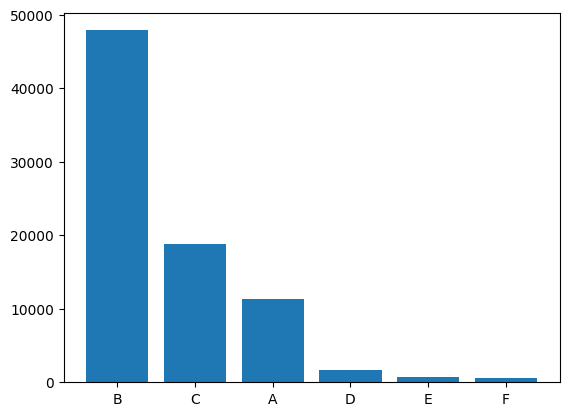

In [79]:
# Bar Chart
plt.bar(los_value_counts.index, los_value_counts.values)
plt.show()

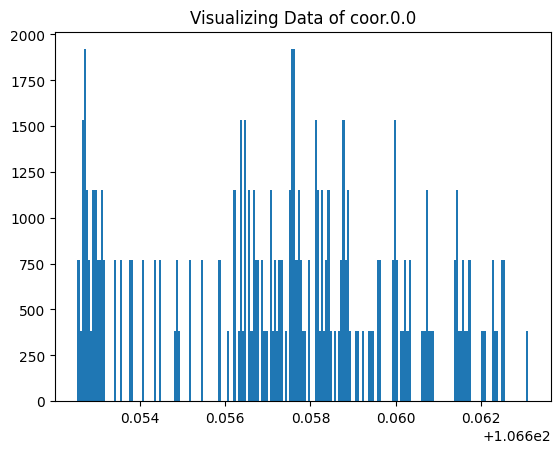

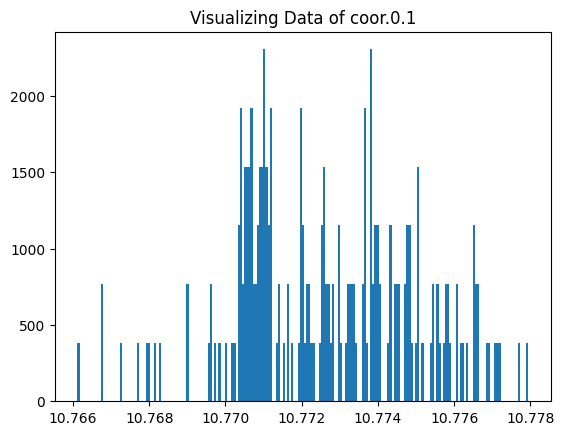

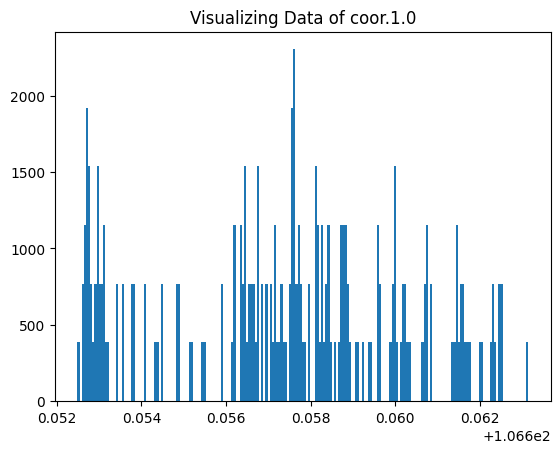

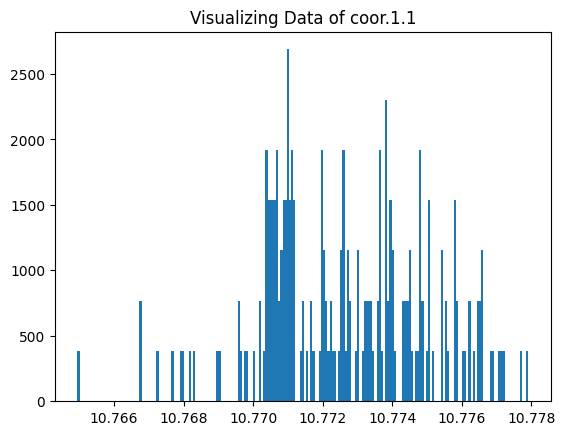

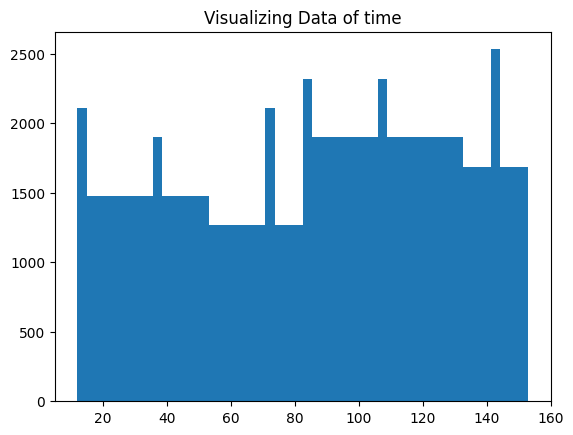

In [80]:
# Histogram
for name in feature_names:
  count = street_data[name].value_counts()
  plt.title(f'Visualizing Data of {name}')
  plt.hist(street_data[name], bins=len(count))
  plt.show()

#**Try to Train raw Data**

In [81]:
X1 = street_data[feature_names]
y = street_data.los

#**Import Libraries for traning**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.3, random_state=1)

In [84]:
model = RandomForestClassifier(random_state=10)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

#**Predicting raw Data**

In [85]:
y_pred = model.predict(X_test)

In [86]:
target_names = ['A','B','C','D','E','F']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.09      0.03      0.05      3480
           B       0.80      0.85      0.82     14204
           C       0.69      0.83      0.75      5670
           D       0.64      0.77      0.69       551
           E       0.65      0.80      0.72       220
           F       0.63      0.81      0.71       183

    accuracy                           0.73     24308
   macro avg       0.58      0.68      0.63     24308
weighted avg       0.67      0.73      0.69     24308



###**Evaluating the prediction**

In [87]:
target_names = ['A','B','C','D','E','F']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.09      0.03      0.05      3480
           B       0.80      0.85      0.82     14204
           C       0.69      0.83      0.75      5670
           D       0.64      0.77      0.69       551
           E       0.65      0.80      0.72       220
           F       0.63      0.81      0.71       183

    accuracy                           0.73     24308
   macro avg       0.58      0.68      0.63     24308
weighted avg       0.67      0.73      0.69     24308



##=> The measure between the labels is not uniform
## Label 'B' with the most data has the highest accuracy

In [88]:
cmatrix = confusion_matrix(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)

print("Ma trận nhầm lẫn: ")
print(cmatrix)
print("Độ chính xác (precision): {:7.2f}%".format(precision*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(recall*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(f1*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Ma trận nhầm lẫn: 
[[  109  2338   843   187     3     0]
 [  615 12083  1297    48    75    86]
 [  388   554  4723     3     2     0]
 [   71    42     0   422    16     0]
 [    0    39     0     4   177     0]
 [    0    34     0     0     0   149]]
Độ chính xác (precision):   58.32%
Độ triệu hồi (recall):   68.33%
Độ đo F1 (F1-measure):   62.52%
Độ chính xác (accuracy):   72.66%


#**Solution: Balancing Data**

###Data before balancing

----------------Data before balancing----------------
B    47920
C    18782
A    11302
D     1692
E      716
F      612
Name: los, dtype: int64


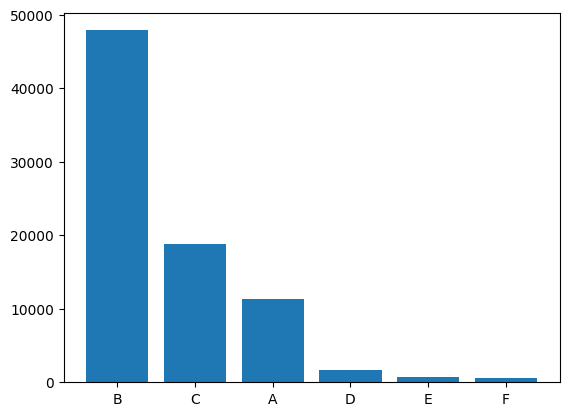

In [89]:
los = street_data.los
original_los_count = list(los.astype("category").value_counts())
print("----------------Data before balancing----------------")
print(los.astype("category").value_counts())
min_los_count = min(original_los_count)

# Bar Chart
plt.bar(los_value_counts.index, los_value_counts.values)
plt.show()

###Data after balancing

In [90]:
street_data = street_data.sample(frac=1, random_state=1)

los_labels = list(set(los.astype("category").values))
all_sub_data = []
for label in los_labels:
    sub_data = street_data[street_data.los == label][:min_los_count]
    all_sub_data.append(sub_data)

new_street_data = pd.concat(all_sub_data)
new_street_data = new_street_data.sample(frac=1, random_state=1)

#################### Balance Done ############
X = new_street_data[feature_names]
y = new_street_data.los

final_los_count = y.astype("category").value_counts()
print("----------------Data after balancing----------------")
print(final_los_count)
print(X)

----------------Data after balancing----------------
A    612
B    612
C    612
D    612
E    612
F    612
Name: los, dtype: int64
         coor.0.0   coor.0.1    coor.1.0   coor.1.1  time
50343  106.661395  10.773976  106.661437  10.773923    51
22134  106.659121  10.766735  106.659621  10.764949    96
57032  106.657215  10.773879  106.657084  10.774351    69
20053  106.657730  10.772045  106.657642  10.772021    72
77028  106.657427  10.772792  106.657520  10.772457    48
...           ...        ...         ...        ...   ...
53857  106.659950  10.771935  106.659988  10.771968    63
51308  106.658102  10.770378  106.658259  10.769816    66
56794  106.658102  10.770378  106.658259  10.769816    66
5060   106.662537  10.775047  106.663150  10.775831    81
59825  106.658686  10.768288  106.658716  10.768182   105

[3672 rows x 5 columns]


##The number of label 'F' is the lowest 
##So we randomly cut the number of remaining 5 labels to equal the number of label 'F'

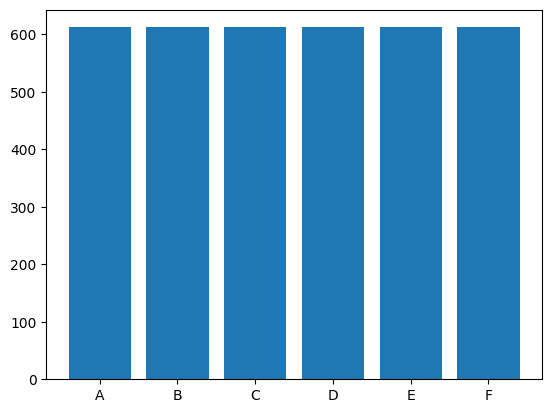

In [91]:
# Bar Chart
plt.bar(final_los_count.index, final_los_count.values)
plt.show()

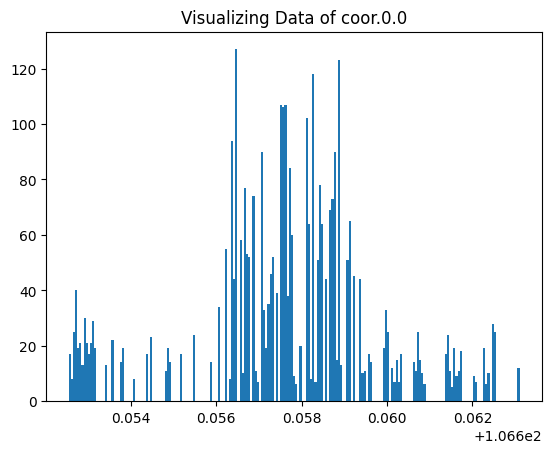

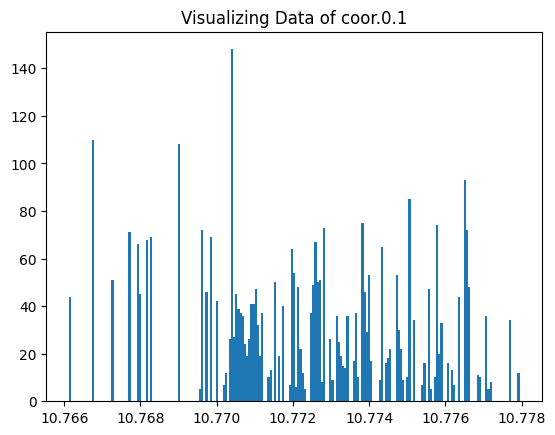

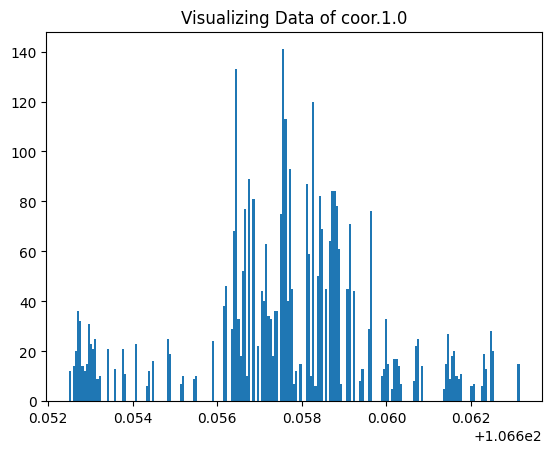

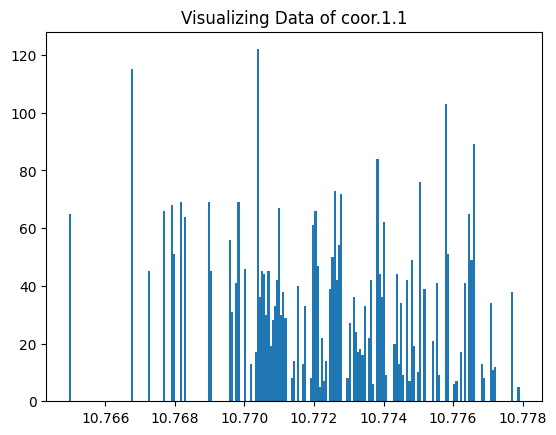

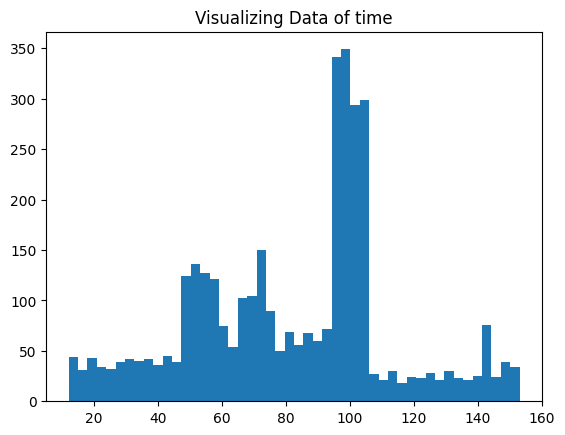

In [92]:
# Histogram
for name in feature_names:
  count = X[name].value_counts()
  plt.title(f'Visualizing Data of {name}')
  plt.hist(X[name], bins=len(count))
  plt.show()

##**We can see in the chart about the number of time Data after balancing**
 * Most of datapoints gather around the value of 100 (about 8:20 AM)
 * The balancing depends on the label with the smallest amount of data (specifically here is 'F')

##**We can conclude that most of the datapoints with los of 'F' are concentrated at around 8:20 AM**

##So the period of 8:20 AM will be the time when the traffic will be the worst

#**Training Data after Balancing**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [94]:
model = RandomForestClassifier(random_state=10)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [95]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

time        0.647967
coor.0.0    0.094182
coor.0.1    0.092286
coor.1.0    0.090022
coor.1.1    0.075542
dtype: float64

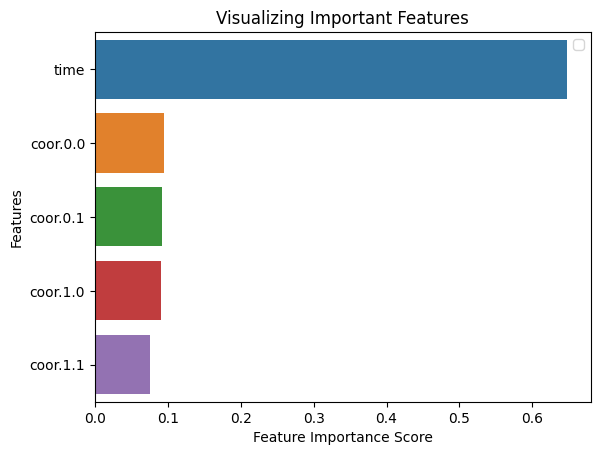

In [96]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

* The data is mainly time dependent rather than coordinates
* We can conclude that around the Bach Khoa University, the traffic is uniform and changes depending on the time of day.

#**Predicting Data**

In [97]:
y_pred = model.predict(X_test)

In [98]:
target_names = ['A','B','C','D','E','F']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.58      0.48      0.53       189
           B       0.69      0.69      0.69       193
           C       0.73      0.76      0.75       180
           D       0.85      0.95      0.90       173
           E       0.95      0.96      0.95       185
           F       0.99      1.00      1.00       182

    accuracy                           0.80      1102
   macro avg       0.80      0.81      0.80      1102
weighted avg       0.80      0.80      0.80      1102



#**Evaluating the prediction**

In [99]:
cmatrix = confusion_matrix(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)

print("Ma trận nhầm lẫn: ")
print(cmatrix)
print("Độ chính xác (precision): {:7.2f}%".format(precision*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(recall*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(f1*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Ma trận nhầm lẫn: 
[[ 91  46  30  22   0   0]
 [ 37 134  20   0   2   0]
 [ 24  12 137   2   4   1]
 [  4   0   0 165   4   0]
 [  0   3   0   4 178   0]
 [  0   0   0   0   0 182]]
Độ chính xác (precision):   79.99%
Độ triệu hồi (recall):   80.88%
Độ đo F1 (F1-measure):   80.30%
Độ chính xác (accuracy):   80.49%
